<a href="https://colab.research.google.com/github/toryn13/LILIpaper/blob/main/BIOC003_stats_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the python libraries

# Part 1

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

The data is taken from https://nutrition.bmj.com/content/2/1/1

In [2]:
#Download and load the dataset
# Using a dataset about the effect of lifestyle factors on health outcomes
!wget "https://raw.githubusercontent.com/toryn13/Rexamples/main/lifestyledata.csv"

# Load the data into a pandas DataFrame
lifedata = pd.read_csv("lifestyledata.csv")

--2024-12-08 12:00:10--  https://raw.githubusercontent.com/toryn13/Rexamples/main/lifestyledata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1137300 (1.1M) [text/plain]
Saving to: ‘lifestyledata.csv’

lifestyledata.csv   100%[===================>]   1.08M  --.-KB/s    in 0.06s   

2024-12-08 12:00:11 (17.7 MB/s) - ‘lifestyledata.csv’ saved [1137300/1137300]



In [3]:
lifedata.columns

Index(['ID of participants', 'Sex', 'Year of birth', 'Month of birth',
       'Day of birth', 'Year of data', 'Time of data',
       'Blood pressure_category', 'Triglyceride-category', 'HDL_category',
       'LDL_category', 'GPT_category', 'g-GTP_category', 'HbA1c_category',
       'Age', 'Living area ', 'Height', 'Weight', 'Waist circumference (cm)',
       'BMI', 'Fasting blood glucose', 'HbA1c', 'Triglyceride', 'HDL', 'LDL',
       'Systolic BP', 'Diastolic BP', 'Smoking status', 'healthgui_active',
       'healthgui_motivation', 'GOT', 'GPT', '_-GTP', 'Uric acid',
       'Urinary glucose', 'Serum creatinine', 'eGFR', 'Uric-pro',
       'cardiograph', 'eyeground', 'Hematocrit', 'Hemoglobin',
       'Taking health care from doctor_category', 'PHN_category',
       'CI_category', 'Care-category', 'Taking medication for hypertenstion',
       'Taking medication for hyperlipidemia',
       'Taking medication for diabetes', 'History of cardiovascular diseases',
       'History of Dialysi

In [ ]:
# Count the number of observations for each variable
print("Number of observations for each variable:")
lifedata.count()

Number of observations for each variable:
ID of participants           6156
Sex                          6156
Year of birth                6156
Month of birth               6156
Day of birth                 6156
                             ... 
Alcohol drinking-category    6005
Alcohol amount-category      5431
Enough sleep                 5980
Improve lifestyle habits     5851
Hope for health guidance     5862
Length: 67, dtype: int64


## Here we are plotting with the plotly library

In [ ]:
# Visualize the distribution of HbA1c (a health measure)
fig = px.histogram(lifedata, x="HbA1c", title="Histogram of HbA1c")
fig.update_layout(title_font_size=24)
fig.show()

# Q1: plot another numeric and assess the distribution.




In [ ]:
# A: Test if HbA1c follows a normal distribution
# We use the Shapiro-Wilk test, which is suitable for small sample sizes
#stat, p_value = stats.shapiro(lifedata["HbA1c"])
#print(f"Shapiro-Wilk test statistic: {stat:.3f}, p-value: {p_value:.3f}")
#if p_value > 0.05:
#    print("The data appears to be normally distributed (p > 0.05).")
#else:
#    print("The data does not appear to be normally distributed (p <= 0.05).")

Shapiro-Wilk test statistic: 0.808, p-value: 0.000
The data does not appear to be normally distributed (p <= 0.05).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6156.



# Q3 Is your variable normally distributed?

In [ ]:
# B:
#We use the Kolmogorov-Smirnov (K-S) Test:
stat, p_value = stats.kstest(lifedata["HbA1c"], 'norm', args=(lifedata["HbA1c"].mean(), lifedata["HbA1c"].std()))
print(f"K-S test statistic: {stat:.3f}, p-value: {p_value:.3f}")


# Q3:Chose a year of data to work with, here I have selected 2012

In [17]:
#  Filter data for a specific year (2012)
lifedata2012 = lifedata.loc[lifedata["Year of data"] == 2012]
print(f"Data for 2012 contains {len(lifedata2012)} records.")

Data for 2012 contains 1672 records.


# Q4: Does you variable change with smoking status?

In [18]:
# Create a boxplot to visualize LDL levels by smoking status
fig = px.box(
    lifedata2012, x="Smoking status", y="LDL",
    title="Boxplot of LDL by Smoking Status", width=800, height=400
)
fig.update_layout(title_font_size=20)
fig.show()

In [33]:
# Calculate summary statistics for LDL by smoking status
# This helps to understand central tendency and spread for smokers and non-smokers
print("Summary statistics for LDL by Smoking Status:")
lifedata2012.groupby("Smoking status").describe().LDL

Summary statistics for LDL by Smoking Status:


,count,mean,std,min,25%,50%,75%,max
Smoking status,,,,,,,,
0,1512.0,127.292328,31.122277,33.0,106.75,125.0,147.00,345.0
1,160.0,123.212500,34.414307,23.0,101.00,122.5,142.25,227.0


In [21]:
# Divide the data into smokers and nonsmokers for comparison
smokers = lifedata2012.loc[lifedata2012["Smoking status"] == 1]
nonsmokers = lifedata2012.loc[lifedata2012["Smoking status"] == 0]

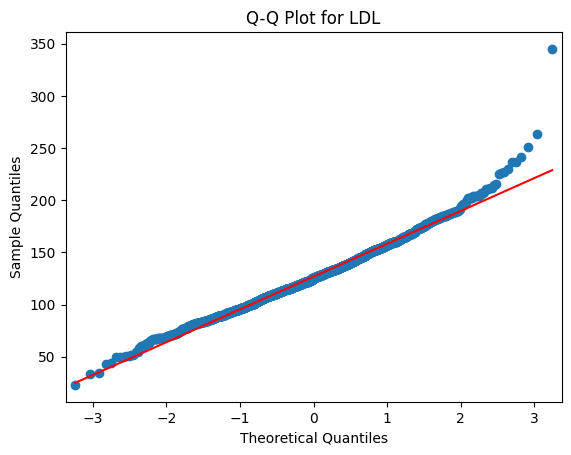

In [22]:
# Create a Q-Q plot to check if LDL levels are normally distributed
# A Q-Q plot compares the distribution of data against a theoretical normal distribution
sm.qqplot(lifedata2012["LDL"], line='s')
plt.title("Q-Q Plot for LDL")
plt.show()

In [23]:
# Perform an independent t-test to compare Triglyceride levels
# between smokers and nonsmokers
stat, p_value = stats.ttest_ind(smokers["Triglyceride"], nonsmokers["Triglyceride"], equal_var=False)
print(f"T-test statistic: {stat:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print("There is a significant difference in Triglyceride levels between smokers and nonsmokers.")
else:
    print("There is no significant difference in Triglyceride levels between smokers and nonsmokers.")

T-test statistic: 5.147, p-value: 0.000
There is a significant difference in Triglyceride levels between smokers and nonsmokers.


#Q3:Compute the above, Summary data, QQplot and T Test for your chosen varibale (against smoking status)

## Here is how we perform an ANOVA, comparing 3 or more independent groups.

In [24]:
from scipy import stats

# Group the data by HbA1c_category and extract Triglyceride levels for each group
groups = [group["Triglyceride"] for _, group in lifedata2012.groupby("HbA1c_category")]

# Perform ANOVA
aov_stat, aov_p_value = stats.f_oneway(*groups)

# Display the results
print(f"ANOVA F-statistic: {aov_stat:.3f}, p-value: {aov_p_value:.3f}")
if aov_p_value < 0.05:
    print("There is a significant difference in Triglyceride levels between HbA1c categories.")
else:
    print("There is no significant difference in Triglyceride levels between HbA1c categories.")


ANOVA F-statistic: 4.650, p-value: 0.003
There is a significant difference in Triglyceride levels between HbA1c categories.


## Here is a scatter plot

In [25]:
# Scatter plot and correlation
# Visualize the relationship between height and weight with a scatter plot
fig = px.scatter(
    lifedata2012, x="Weight", y="Height", trendline="ols",
    title="Scatter Plot of Height and Weight"
)
fig.show()

# Here is the code for correlations

In [ ]:
# Calculate Pearson correlation (measures linear relationship)
corr, p_value = stats.pearsonr(lifedata2012["Height"], lifedata2012["Weight"])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")


In [ ]:

# Calculate Spearman correlation (measures monotonic relationship)
corr, p_value = stats.spearmanr(lifedata2012["BMI"], lifedata2012["Triglyceride"])
print(f"Spearman correlation: {corr:.3f}, p-value: {p_value:.3f}")


## Linear regression

In [30]:
# Step 13: Perform a simple linear regression for LDL ~ Weight
# Linear regression predicts Height based on Weight
X = lifedata2012[["Weight"]]
X = sm.add_constant(X)  # Add an intercept (constant term) to the model
y = lifedata2012["LDL"]


In [32]:
model = sm.OLS(y, X).fit()
print("Simple Linear Regression Results (LDL ~ Weight):")
print(model.summary())

Simple Linear Regression Results (LDL ~ Weight):
                            OLS Regression Results                            
Dep. Variable:                    LDL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.112
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.146
Time:                        20:16:47   Log-Likelihood:                -8137.4
No. Observations:                1672   AIC:                         1.628e+04
Df Residuals:                    1670   BIC:                         1.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

# More on Pandas

In [6]:
# Summary statistics for numerical columns
lifedata.describe()


,Sex,Year of birth,Month of birth,Day of birth,Year of data,Time of data,Blood pressure_category,Triglyceride-category,HDL_category,LDL_category,...,Weight changes within 1 yr-category,Quick eating-category,Eating within 2 hr before bed-category,Midnight snack-category,Skipping breakfast-category,Alcohol drinking-category,Alcohol amount-category,Enough sleep,Improve lifestyle habits,Hope for health guidance
count,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,...,5865.000000,5866.000000,5964.000000,5867.000000,5999.000000,6005.000000,5431.000000,5980.000000,5851.000000,5862.000000
mean,0.386290,1947.858025,6.077485,14.742528,2013.109162,1.109162,1.392950,1.025666,1.295322,1.461663,...,1.793350,1.877941,1.887324,1.882052,1.945491,2.384513,1.279875,1.243478,2.461118,1.571136
std,0.486938,7.698691,3.507125,9.015637,0.800350,0.800350,0.613476,0.158150,0.574733,0.731329,...,0.404936,0.533707,0.316223,0.322574,0.227038,0.825675,0.629331,0.429217,1.442215,0.494956
min,0.000000,1938.000000,1.000000,1.000000,2012.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1942.000000,3.000000,7.000000,2012.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1946.000000,6.000000,15.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000
75%,1.000000,1950.000000,9.000000,22.000000,2014.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,2.000000
max,1.000000,1975.000000,12.000000,31.000000,2014.000000,2.000000,3.000000,2.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,5.000000,2.000000


In [7]:
# Select the 'Age' column
lifedata['Age']

# Select multiple columns
selected_columns = lifedata[['Age', 'BMI', 'Height']]
selected_columns.head()


,Age,BMI,Height
0,68,22.1,147.5
1,69,21.8,147.5
2,70,22.1,147.5
3,73,23.4,148.2
4,74,23.5,147.0


In [8]:
# Select the first 5 rows
lifedata.iloc[:5]

# Select rows where BMI > 25 (filtering)
lifedata[lifedata['BMI'] > 25]


,ID of participants,Sex,Year of birth,Month of birth,Day of birth,Year of data,Time of data,Blood pressure_category,Triglyceride-category,HDL_category,...,Weight changes within 1 yr-category,Quick eating-category,Eating within 2 hr before bed-category,Midnight snack-category,Skipping breakfast-category,Alcohol drinking-category,Alcohol amount-category,Enough sleep,Improve lifestyle habits,Hope for health guidance
8,BC000005,1,1938,5,1,2012,0,1,1,2,...,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0,1.0
32,BC000018,1,1939,8,2,2012,0,1,1,2,...,2.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,5.0,2.0
33,BC000018,1,1939,8,2,2013,1,1,1,2,...,2.0,3.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0
47,BC000026,0,1941,2,26,2012,0,2,1,1,...,2.0,2.0,2.0,1.0,2.0,3.0,NaN,1.0,2.0,1.0
48,BC000026,0,1941,2,26,2013,1,2,1,1,...,2.0,1.0,2.0,1.0,2.0,3.0,NaN,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,BC003278,0,1942,6,3,2012,0,2,1,1,...,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0
6147,BC003278,0,1942,6,3,2014,2,1,1,1,...,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0
6150,BC003280,0,1951,3,18,2014,2,1,1,1,...,1.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,2.0,1.0
6153,BC003283,0,1947,2,3,2012,0,1,1,1,...,1.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0,1.0


## Select a column by name

In [ ]:
lifedata.loc[:,'HbA1c_category']

## Select rows by values

In [10]:
# Find participants who are smokers and have high BMI
smokers_high_bmi = lifedata[(lifedata['Smoking status'] == 1) & (lifedata['BMI'] > 25)]
smokers_high_bmi.head()


,ID of participants,Sex,Year of birth,Month of birth,Day of birth,Year of data,Time of data,Blood pressure_category,Triglyceride-category,HDL_category,...,Weight changes within 1 yr-category,Quick eating-category,Eating within 2 hr before bed-category,Midnight snack-category,Skipping breakfast-category,Alcohol drinking-category,Alcohol amount-category,Enough sleep,Improve lifestyle habits,Hope for health guidance
8,BC000005,1,1938,5,1,2012,0,1,1,2,...,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0,1.0
82,BC000046,1,1948,3,14,2014,2,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,BC000094,1,1940,4,23,2012,0,2,1,2,...,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,4.0,2.0
177,BC000094,1,1940,4,23,2013,1,1,1,2,...,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,3.0,2.0
277,BC000149,0,1965,1,20,2012,0,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Get average and median BMI by smoking status
stats_by_smoking = lifedata.groupby('Smoking status')['BMI'].agg(['mean', 'median', 'max'])
stats_by_smoking


,mean,median,max
Smoking status,,,
0,23.103057,22.8,45.1
1,23.112273,22.7,40.3


In [12]:
# Add a column for Weight category
lifedata['Weight_category'] = ['Underweight' if x < 18.5 else 'Normal weight' if x < 25 else 'Overweight' for x in lifedata['BMI']]
lifedata[['BMI', 'Weight_category']].head()


,BMI,Weight_category
0,22.1,Normal weight
1,21.8,Normal weight
2,22.1,Normal weight
3,23.4,Normal weight
4,23.5,Normal weight


In [15]:
# Check for missing values
lifedata.isnull().sum()


,0
ID of participants,0
Sex,0
Year of birth,0
Month of birth,0
Day of birth,0
...,...
Alcohol amount-category,725
Enough sleep,176
Improve lifestyle habits,305
Hope for health guidance,294


# Part 2

## Downdload another metabolic dataset

In [34]:
!wget https://raw.githubusercontent.com/toryn13/LILIpaper/refs/heads/main/clincial.csv

--2024-12-08 21:10:55--  https://raw.githubusercontent.com/toryn13/LILIpaper/refs/heads/main/clincial.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32440 (32K) [text/plain]
Saving to: ‘clincial.csv’

clincial.csv        100%[===================>]  31.68K  --.-KB/s    in 0.01s   

2024-12-08 21:10:55 (3.06 MB/s) - ‘clincial.csv’ saved [32440/32440]



Part 1: Importing and Setting Up
How would you import the necessary libraries (pandas and plotly) and load the dataset into a pandas DataFrame named df?

Part 2: Exploring the Dataset

What code would you use to:

- View the first 5 rows of the dataset?
- Check the structure and column data types?
- Get summary statistics for numerical columns?

- How can you identify if there are any missing values
in the dataset?


Part 3: Cleaning the Data

- How can you drop rows where Triglycerides values are missing?

Part 4: Filtering and Selecting Data
- Write code to filter rows where participants belong to the "Lifestyle" group and have a BMI greater than 25.

- How can you select only the columns Age, BMI, and Fat % Total from the dataset?

- How would you filter rows for a specific participant (e.g., subject ID is 1)?

Part 5: Write a query to perform a T test of triglyceride using the column 'treat_g' as a grouping factor.



Part 6: Visualization with Plotly
How can you create a histogram to show the distribution of BMI?

- Create a scatter plot that shows the relationship between Fat % Total and BMI, with points colored by group.

- How can you plot a line chart showing the trend of Fat % Total over visits for a single participant (e.g., subject ID 1)?

- Create a boxplot comparing Fat % Total across the different group categories.